In [1]:
from config import CONFIG
from utils import series_to_supervised

CONFIG

{'columns': ['Close', 'Volume', 'Low', 'High'],
 'csv_src_file': 'BTC_ETH',
 'filename': 'BTC_ETH_lstm_i30_o12_Close_Volume_Low_High',
 'folder': {'data': 'data/', 'weights': 'weights/'},
 'input_size': 30,
 'lstm_hidden_size': 50,
 'name': 'lstm',
 'output_size': 12,
 'pair': 'BTC_ETH',
 'period': 300}

In [2]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from pandas import read_csv
from pandas import DataFrame
from pandas import concat
from matplotlib import pyplot
 
#data file path
dfp = ''.join([CONFIG['folder']['data'], CONFIG['csv_src_file'], '.csv'])

#Columns of price data to use
columns = CONFIG['columns']
# df = pd.read_csv(dfp).dropna().tail(1000000)
dataset = pd.read_csv(dfp)

# to drop values before 2018 1514764800, March 2018 1519862400, July 2017 1498867200
dataset = dataset[dataset.Timestamp > 1519862400]
dataset.head()

,Close,Timestamp,High,Low,Open,Volume
269507,0.082828,1519862700,0.082856,0.082729,0.082729,4.151247
269508,0.082609,1519863000,0.082828,0.082606,0.082828,5.551513
269509,0.082552,1519863300,0.082673,0.082547,0.082609,2.327443
269510,0.082460,1519863600,0.082625,0.082419,0.082552,1.519736
269511,0.082455,1519863900,0.082460,0.082418,0.082455,0.552411


In [3]:
values = dataset.loc[:,columns].values

In [4]:
# parameters to prepare the dataset for learning 
n_lag = CONFIG['input_size']
n_out = CONFIG['output_size']
n_features = len(columns)
n_lag,n_features,n_out

(30, 4, 12)

In [5]:
# scale dataset
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(values)

In [6]:
# frame as supervised learning
reframed = series_to_supervised(scaled, n_lag, n_out)
reframed.head(10)

,var1(t-30),var2(t-30),var3(t-30),var4(t-30),var1(t-29),var2(t-29),var3(t-29),var4(t-29),var1(t-28),var2(t-28),...,var3(t+9),var4(t+9),var1(t+10),var2(t+10),var3(t+10),var4(t+10),var1(t+11),var2(t+11),var3(t+11),var4(t+11)
30,0.911499,0.005383,0.909966,0.888220,0.904896,0.007199,0.906295,0.887362,0.903185,0.003018,...,0.902730,0.882924,0.903218,0.000487,0.902156,0.882912,0.903810,0.001179,0.902319,0.882907
31,0.904896,0.007199,0.906295,0.887362,0.903185,0.003018,0.904533,0.882607,0.900404,0.001971,...,0.902156,0.882912,0.903810,0.001179,0.902319,0.882907,0.909454,0.001097,0.905317,0.885319
32,0.903185,0.003018,0.904533,0.882607,0.900404,0.001971,0.900683,0.881134,0.900251,0.000716,...,0.902319,0.882907,0.909454,0.001097,0.905317,0.885319,0.907357,0.000555,0.908805,0.885254
33,0.900404,0.001971,0.900683,0.881134,0.900251,0.000716,0.900682,0.876073,0.899950,0.001567,...,0.905317,0.885319,0.907357,0.000555,0.908805,0.885254,0.911044,0.007564,0.906050,0.887050
34,0.900251,0.000716,0.900682,0.876073,0.899950,0.001567,0.899785,0.879122,0.900536,0.001585,...,0.908805,0.885254,0.911044,0.007564,0.906050,0.887050,0.910657,0.003413,0.911403,0.887051
35,0.899950,0.001567,0.899785,0.879122,0.900536,0.001585,0.899590,0.876207,0.898062,0.002247,...,0.906050,0.887050,0.910657,0.003413,0.911403,0.887051,0.907522,0.008177,0.907607,0.887051
36,0.900536,0.001585,0.899590,0.876207,0.898062,0.002247,0.899590,0.877975,0.900530,0.001073,...,0.911403,0.887051,0.907522,0.008177,0.907607,0.887051,0.900615,0.003681,0.902132,0.887033
37,0.898062,0.002247,0.899590,0.877975,0.900530,0.001073,0.899590,0.876218,0.898052,0.000990,...,0.907607,0.887051,0.900615,0.003681,0.902132,0.887033,0.906061,0.001641,0.901759,0.881837
38,0.900530,0.001073,0.899590,0.876218,0.898052,0.000990,0.899590,0.877294,0.900246,0.001661,...,0.902132,0.887033,0.906061,0.001641,0.901759,0.881837,0.899258,0.016586,0.895942,0.881826
39,0.898052,0.000990,0.899590,0.877294,0.900246,0.001661,0.899590,0.876158,0.900536,0.000313,...,0.901759,0.881837,0.899258,0.016586,0.895942,0.881826,0.903952,0.012982,0.899591,0.883312


In [7]:
# drop columns we don't want to predict
# We're only concerned with the estimating the close value,
# Close should be first in the list of column in the config file

cols_to_drop = []

for i in range (n_out):
    for j in range(1, n_features):
        cols_to_drop.append(reframed.shape[1]-(i*n_features+j))

reframed.drop(reframed.columns[cols_to_drop], axis=1, inplace=True)

reframed.head()

,var1(t-30),var2(t-30),var3(t-30),var4(t-30),var1(t-29),var2(t-29),var3(t-29),var4(t-29),var1(t-28),var2(t-28),...,var1(t+2),var1(t+3),var1(t+4),var1(t+5),var1(t+6),var1(t+7),var1(t+8),var1(t+9),var1(t+10),var1(t+11)
30,0.911499,0.005383,0.909966,0.888220,0.904896,0.007199,0.906295,0.887362,0.903185,0.003018,...,0.908729,0.903118,0.904913,0.909531,0.907403,0.907393,0.907137,0.903187,0.903218,0.903810
31,0.904896,0.007199,0.906295,0.887362,0.903185,0.003018,0.904533,0.882607,0.900404,0.001971,...,0.903118,0.904913,0.909531,0.907403,0.907393,0.907137,0.903187,0.903218,0.903810,0.909454
32,0.903185,0.003018,0.904533,0.882607,0.900404,0.001971,0.900683,0.881134,0.900251,0.000716,...,0.904913,0.909531,0.907403,0.907393,0.907137,0.903187,0.903218,0.903810,0.909454,0.907357
33,0.900404,0.001971,0.900683,0.881134,0.900251,0.000716,0.900682,0.876073,0.899950,0.001567,...,0.909531,0.907403,0.907393,0.907137,0.903187,0.903218,0.903810,0.909454,0.907357,0.911044
34,0.900251,0.000716,0.900682,0.876073,0.899950,0.001567,0.899785,0.879122,0.900536,0.001585,...,0.907403,0.907393,0.907137,0.903187,0.903218,0.903810,0.909454,0.907357,0.911044,0.910657


In [8]:
reframed_values = reframed.values
# split into train and test sets
training_size = int(0.8* reframed_values.shape[0])
train = reframed_values[:training_size, :]
test = reframed_values[training_size:, :]

In [9]:
# split into input and outputs
n_obs = n_lag * n_features

# We're only concerned with the estimating the close value,
# Close should be first in the list of column in the config file

n_outputs = n_out * n_features
train_x, train_y = train[:, :n_obs], train[:, -n_out:]
test_x, test_y = test[:, :n_obs], test[:, -n_out:]

# reshape input to be 3D [samples, timesteps, features]
train_x = train_x.reshape((train_x.shape[0], n_lag, n_features))
test_x = test_x.reshape((test_x.shape[0], n_lag, n_features))

# reshape output to be 3D [samples, timesteps, features]
train_y = train_y.reshape(-1, n_out, 1)
test_y = test_y.reshape(-1, n_out, 1)

print(train_x.shape, train_y.shape, test_x.shape, test_y.shape)

((23632, 30, 4), (23632, 12, 1), (5909, 30, 4), (5909, 12, 1))


In [10]:
model_name=''.join([CONFIG['folder']['weights'], CONFIG['filename'], '_model', '.json'])
model_weights_name=''.join([CONFIG['folder']['weights'], CONFIG['filename'], '_model_weights', '.h5'])

In [11]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Input
from keras.layers import LSTM, CuDNNLSTM, GRU,CuDNNGRU
from keras.layers import Conv1D, AveragePooling1D, MaxPooling1D
from keras.layers import Dropout, Flatten
from keras.layers import Activation, BatchNormalization
from keras.layers import TimeDistributed
from keras.layers import Bidirectional
from keras.layers import RepeatVector
from keras.callbacks import ModelCheckpoint

units= CONFIG['lstm_hidden_size']
dropout = .1

# design network
model = Sequential()
model.add(Bidirectional(LSTM(units), input_shape=(train_x.shape[1], train_x.shape[2])))
model.add(Dropout(dropout))

model.add(RepeatVector(n_out))

model.add(LSTM(units/2, return_sequences=True))
model.add(Dropout(dropout))

# We're only concerned with the estimating the close value,
# otherwise use n_outputs instead of 1
# Dense(n_outputs, ...
model.add(TimeDistributed(Dense(1, activation='relu')))

model.compile(loss='mse', optimizer='adam')

# store model
# serialize model to JSON
model_json = model.to_json()
with open(model_name, "w") as json_file:
    json_file.write(model_json)

model.summary()

/usr/local/lib/python2.7/dist-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
bidirectional_1 (Bidirection (None, 100)               22000     
_________________________________________________________________
dropout_1 (Dropout)          (None, 100)               0         
_________________________________________________________________
repeat_vector_1 (RepeatVecto (None, 12, 100)           0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 12, 25)            12600     
_________________________________________________________________
dropout_2 (Dropout)          (None, 12, 25)            0         
_________________________________________________________________
time_distributed_1 (TimeDist (None, 12, 1)             26        
Total params: 34,626
Trainable params: 34,626
Non-trainable params: 0
_________________________________________________________________


In [12]:
epochs=25
batch_size=1024

In [13]:
# fit network
history = model.fit(train_x, train_y, epochs=epochs, batch_size=batch_size,
                    validation_data=(test_x, test_y), verbose=1, shuffle=False,
                    callbacks=[ModelCheckpoint(model_weights_name, monitor='val_loss', verbose=1,save_best_only='true',
                                              save_weights_only=True)])

Train on 23632 samples, validate on 5909 samples
Epoch 1/25
23632/23632 [==============================] - 3s 109us/step - loss: 0.1261 - val_loss: 0.0294

Epoch 00001: val_loss improved from inf to 0.02943, saving model to weights/BTC_ETH_lstm_i30_o12_Close_Volume_Low_High_model_weights.h5
Epoch 2/25
23632/23632 [==============================] - 1s 51us/step - loss: 0.0244 - val_loss: 0.0490

Epoch 00002: val_loss did not improve from 0.02943
Epoch 3/25
23632/23632 [==============================] - 1s 50us/step - loss: 0.0460 - val_loss: 0.0171

Epoch 00003: val_loss improved from 0.02943 to 0.01709, saving model to weights/BTC_ETH_lstm_i30_o12_Close_Volume_Low_High_model_weights.h5
Epoch 4/25
23632/23632 [==============================] - 1s 51us/step - loss: 0.0376 - val_loss: 0.0115

Epoch 00004: val_loss improved from 0.01709 to 0.01148, saving model to weights/BTC_ETH_lstm_i30_o12_Close_Volume_Low_High_model_weights.h5
Epoch 5/25
23632/23632 [==============================] - 1

In [14]:
# Load the best weights
model.load_weights(model_weights_name)
model.compile(loss='mse', optimizer='adam')
model.evaluate(test_x, test_y)

5909/5909 [==============================] - 2s 371us/step


0.002201281368157488

In [15]:
from matplotlib import pyplot

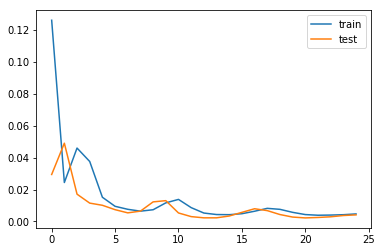

In [16]:
# plot history
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

In [20]:
# Test the prediction of test data
y = model.predict(test_x)

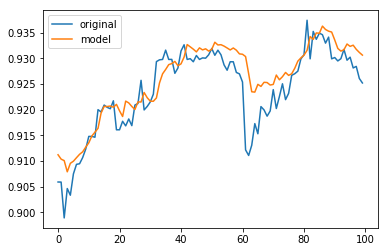

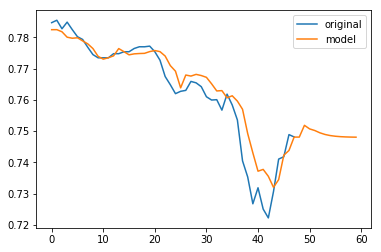

In [21]:
a = test_y[:,0]
b = y[:,0]
c = np.append(b, y[-1], axis=0)

# Show how the model fits the test data
pyplot.plot(a[:100], label='original')
pyplot.plot(b[:100], label='model')
pyplot.legend()
pyplot.show()

# Show how the model predicts data
pos = int(a.shape[0]-n_out*4)
pyplot.plot(a[pos:], label='original')
pyplot.plot(c[pos:], label='model')
pyplot.legend()
pyplot.show()


In [22]:
#Prediction on public data!
period = CONFIG['period']
import time
import urllib2
import json

# Download a live bitcoin price data set
def dl_X(now = None, points = n_lag, period = period, pair=CONFIG['pair']):
    if now == None:
        now = time.time() 
    end = now - now % period
    #print end, time.strftime("%a, %d %b %Y %H:%M:%S +0000", time.gmtime(end))
    start = end - points*period
    #print start, time.strftime("%a, %d %b %Y %H:%M:%S +0000", time.gmtime(start))
    url = "https://poloniex.com/public?command=returnChartData&currencyPair=%s&start=%d&end=%d&period=%d" % (pair, start, end, period)
    openUrl = urllib2.urlopen(url)
    r = openUrl.read()
    openUrl.close()
    d = json.loads(r.decode())[-n_lag:]
    df = pd.DataFrame(d)
    original_columns=[u'close', u'date', u'high', u'low', u'open',u'volume']
    new_columns = ['Close','Timestamp','High','Low','Open','Volume']
    df = df.loc[:,original_columns]
    df.columns = new_columns
    
    return df

In [23]:
def predict(when=None):
    rt_df = dl_X(when)
    rt_values = rt_df.loc[:,columns].values
    rt_scaled = scaler.transform(rt_values)
    rt_x = rt_scaled.reshape((1, n_lag, n_features))
    print rt_x.shape
    return rt_scaled, model.predict(rt_x)

(1, 30, 4)


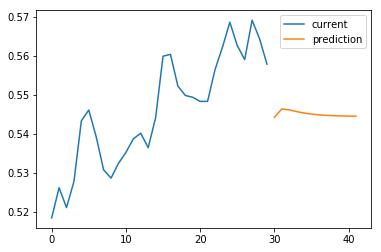

(1, 30, 4)


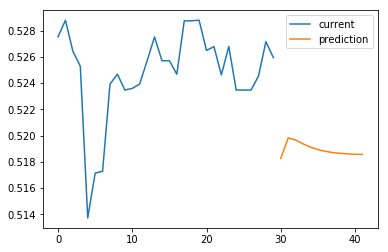

(1, 30, 4)


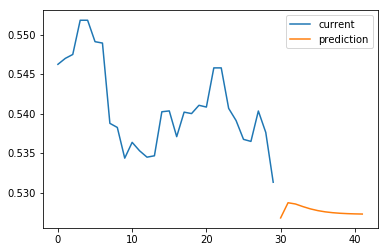

(1, 30, 4)


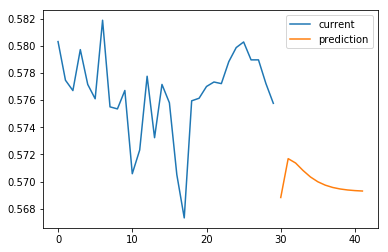

(1, 30, 4)


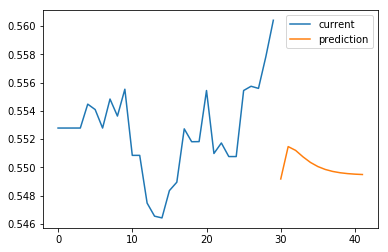

(1, 30, 4)


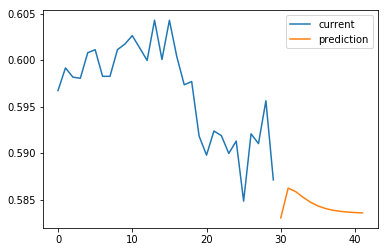

(1, 30, 4)


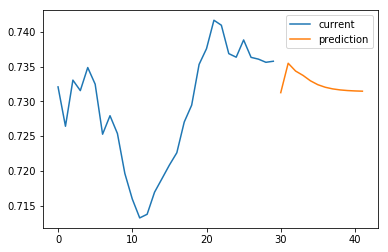

In [24]:
# do some now & past predictions
for t in [0, 100, 200, 300, 500, 1000, 2000]:
    rt_x, prediction = predict(time.time()-t*period)

    current = rt_x[:,0]
    prediction = prediction[0]

    pyplot.plot(current, label='current')

    # shift train predictions for plotting
    predictPlot = np.empty_like(current)
    predictPlot[:] = np.nan
    predictPlot = np.append(predictPlot, prediction)

    pyplot.plot(predictPlot, label='prediction')
    pyplot.legend()
    pyplot.show()

Sat, 30 Jun 2018 01:40:00 +0000
(1, 30, 4)


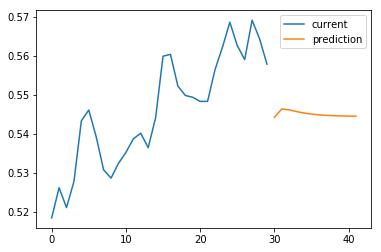

Sat, 30 Jun 2018 01:45:00 +0000
(1, 30, 4)


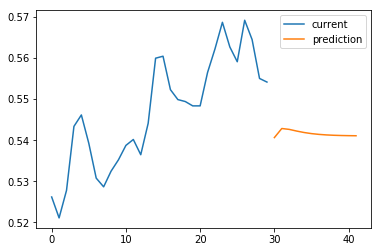

In [ ]:
#Prediction on live data!
starttime=time.time()
while True:
    now = time.time() 
    end = now - now % period
    print time.strftime("%a, %d %b %Y %H:%M:%S +0000", time.gmtime(end))
    rt_x, prediction = predict()

    current = rt_x[:,0]
    prediction = prediction[0]

    pyplot.plot(current, label='current')

    # shift train predictions for plotting
    predictPlot = np.empty_like(current)
    predictPlot[:] = np.nan
    predictPlot = np.append(predictPlot, prediction)

    pyplot.plot(predictPlot, label='prediction')
    pyplot.legend()
    pyplot.show()

    time.sleep(period - ((time.time() - starttime) % period))